### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측 
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
 - 지니 지수는 얼마나 불확실한가(얼마나 많은 것들이 섞여있는가)를 보여주며 지니지수가 0이란 것은 불확실성이 0이라는 것으로 같은 특성을 가진 객체끼리 잘 모여 있다는 의미.
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes



In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# dt_clf = DecisionTreeClassifier(random_state=156)
# pruning(가지치기) : 마지막 leaf 노드들이 root 노드까지 바로 가는 데 걸리는 조건의 개수인 깊이를 제한
# dt_clf = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=156)
dt_clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=156)

iris_data = load_iris()
iris_data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X_train, X_test, y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size = 0.2,random_state = 156)

dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
clf_report = classification_report(y_test,pred)

print(f'결정 트리 예측 정확도: {accuracy:.4f}','\n')
print(f'classification report: \n', clf_report)

결정 트리 예측 정확도: 0.9667 

classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



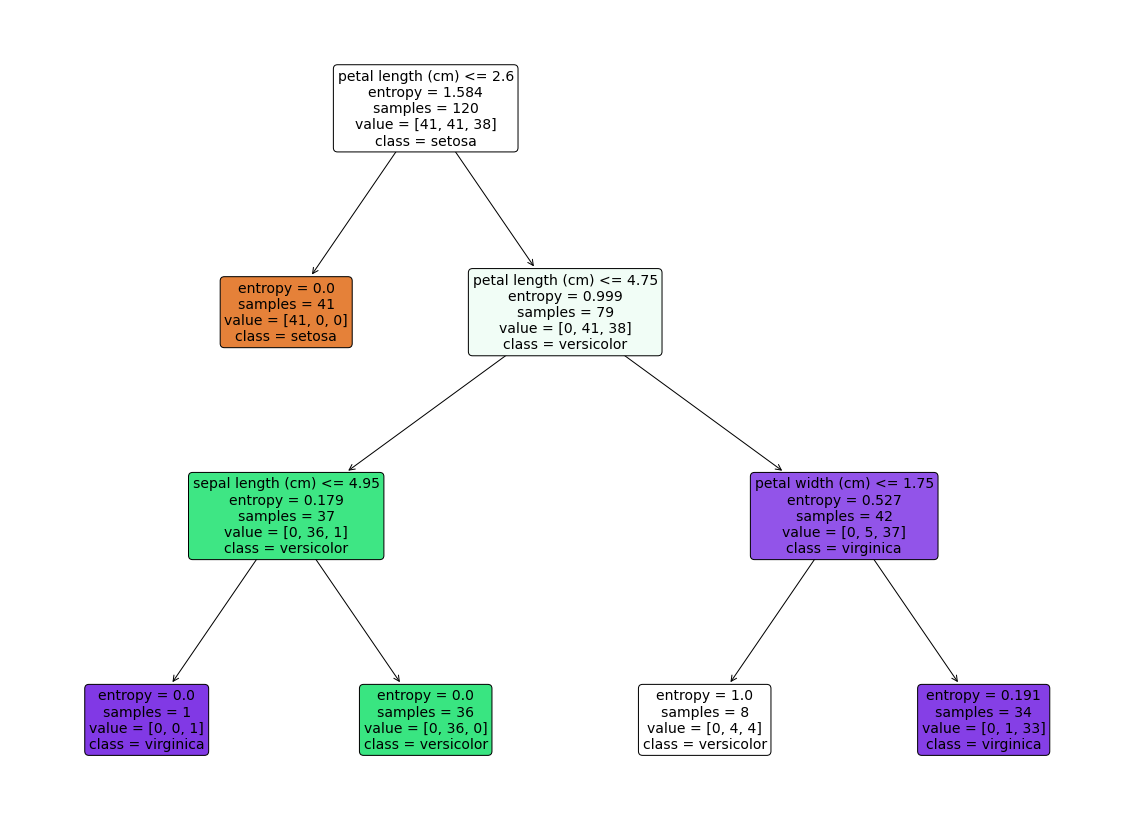

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
tree.plot_tree(dt_clf,filled=True, 
               feature_names = iris_data.feature_names, 
               class_names = iris_data.target_names,
              rounded = True, fontsize = 14)
plt.show()
plt.close()

In [22]:
!pip install graphviz

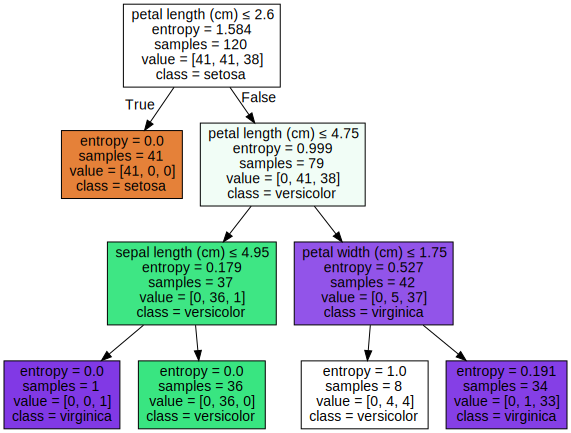

In [4]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt_clf,
                               out_file = None,
                               feature_names = iris_data.feature_names,
                               class_names = iris_data.target_names,
                               filled = True,
                               special_characters = True)
graphviz.Source(dot_data)

### 결정 트리 실습 - Human Activity Recognition

### [과제]
'dataset/human_activity' 폴더의 데이터들을 불러와서 다음을 수행하세요.
- 학습용 평가용 데이터셋 추출
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

feature_name_df = pd.read_csv('./dataset/human_activity/features.txt',sep='\s+',header=None, names = ['column_index','column_name'])
print(len(feature_name_df))
display(feature_name_df.head())
feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

561


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [40]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [43]:
def get_new_feature_name_df(df):
    feature_dup_df = pd.DataFrame(data = df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0],axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis = 1)
    return new_feature_name_df



In [44]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./dataset/human_activity/features.txt',sep='\s+',header=None, names = ['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt',sep='\s+',header = None)
    X_train.columns = feature_name
    
    X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt',sep='\s+',header = None)
    X_test.columns = feature_name
    
    y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt',sep='\s+',header = None,names=['action'])
    
    y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt',sep='\s+',header = None,names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [46]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
clf_report = classification_report(y_test,pred)

print(f'결정 트리 예측 정확도: {accuracy:.4f}','\n')
print(f'classification report: \n', clf_report)

결정 트리 예측 정확도: 0.8548 

classification report: 
               precision    recall  f1-score   support

           1       0.81      0.89      0.84       496
           2       0.81      0.77      0.79       471
           3       0.88      0.82      0.85       420
           4       0.84      0.76      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.86      0.85      0.85      2947



In [47]:
from sklearn.model_selection import GridSearchCV

parameters = { 'max_depth' : [4, 8, 12, 16 ,20]}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)

print(accuracy)

{'max_depth': 16}
0.8513444970102249
0.8574821852731591


In [48]:
parameters = { 'max_depth' : [4, 8, 12, 16 ,20],'min_samples_split' : [16,24]}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)

print(accuracy)

{'max_depth': 8, 'min_samples_split': 16}
0.8548794147162603
0.8717339667458432


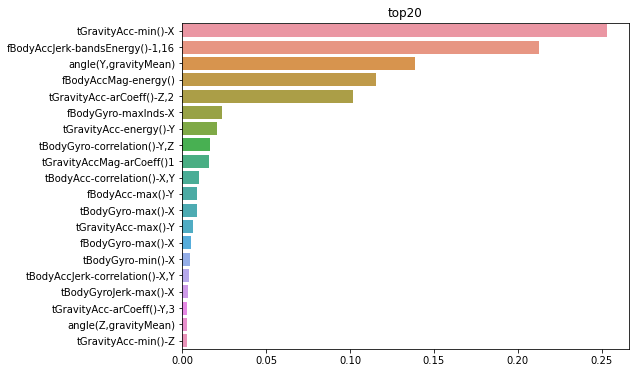

In [49]:
import seaborn as sns

ftr_importances_values = best_dclf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title('top20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()